In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
from io import StringIO

In [2]:
%matplotlib inline
init_notebook_mode(connected=True)
sns.set_style('whitegrid')

In [34]:
pokemon = pd.read_csv('Pokemon.csv')

In [4]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        414 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [6]:
pokemon['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [7]:
pokemon[pokemon['Legendary']]['Type 2'].isnull().value_counts()

False    40
True     25
Name: Type 2, dtype: int64

In [38]:
Legend = pd.get_dummies(pokemon['Legendary'],drop_first=True)

In [39]:
pokemon.drop(['#','Legendary'],axis=1,inplace=True)

In [40]:
pokemon = pd.concat([pokemon,Legend],axis=1)
pokemon.rename({True:'Legend'},axis=1, inplace=True)

In [11]:
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legend
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


/Users/zendz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/Users/zendz/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



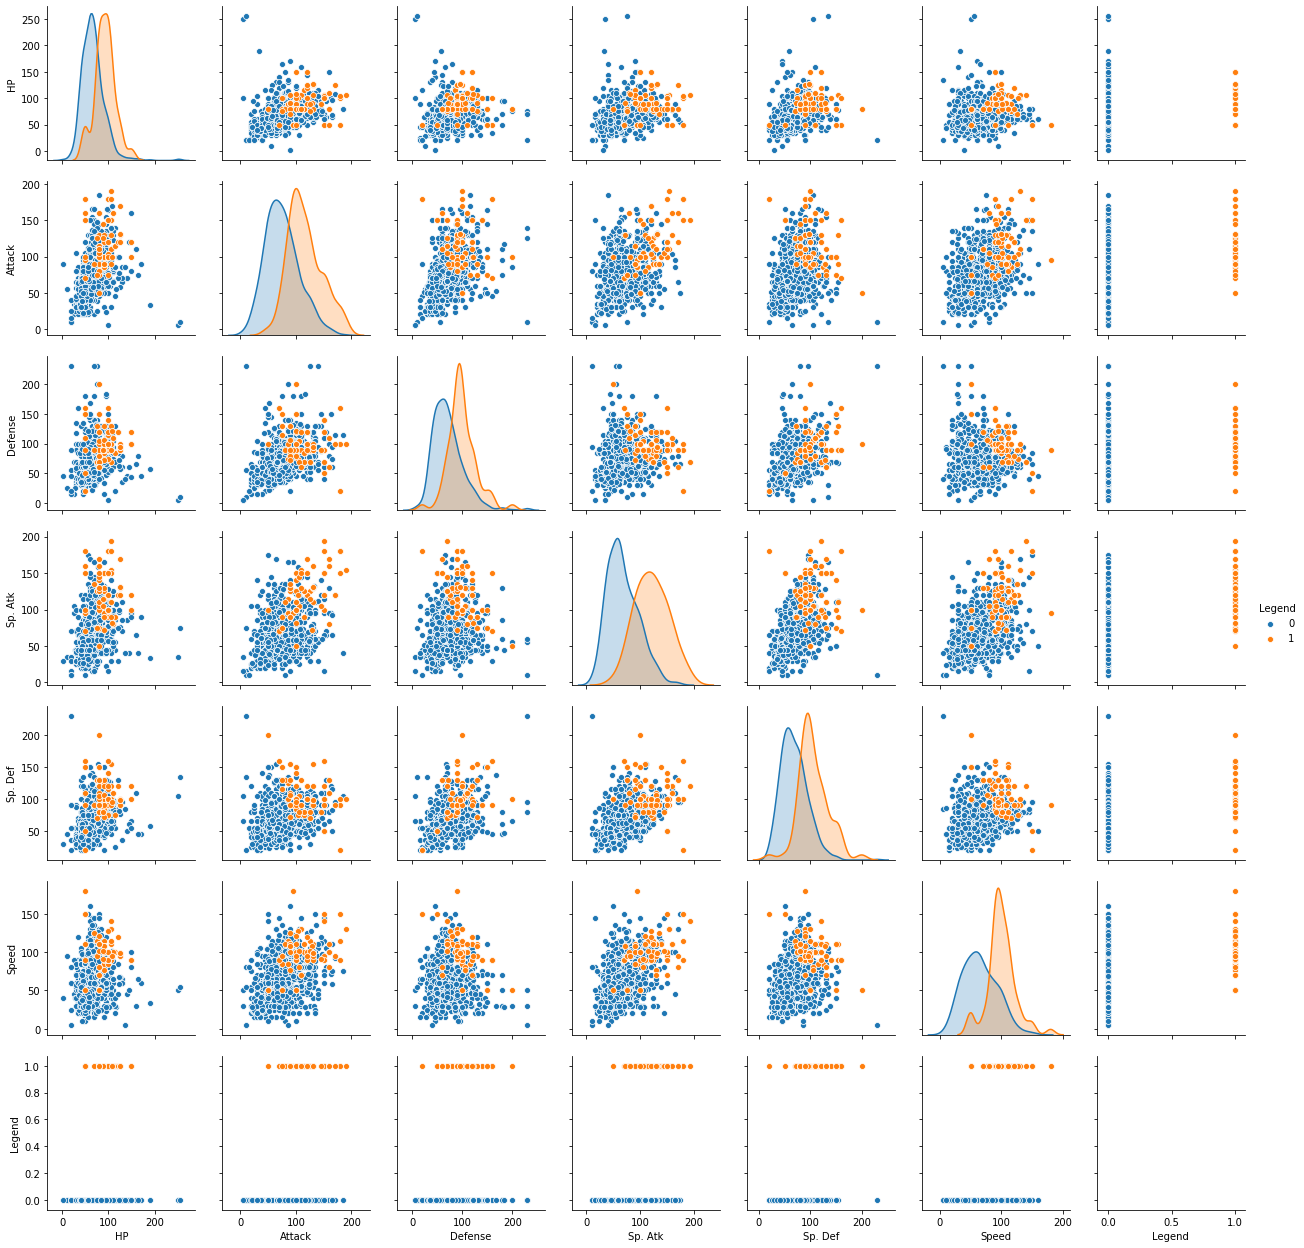

In [12]:
#g=sns.pairplot(pokemon[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Legend']],hue='Legend')

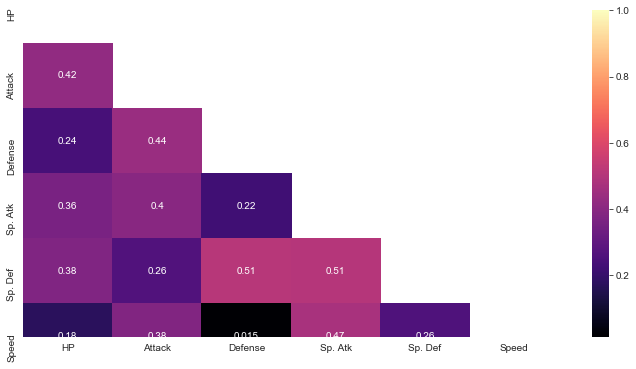

In [12]:
corr = pokemon[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,6))
sns.heatmap(corr,mask=mask,cmap='magma',annot=True)

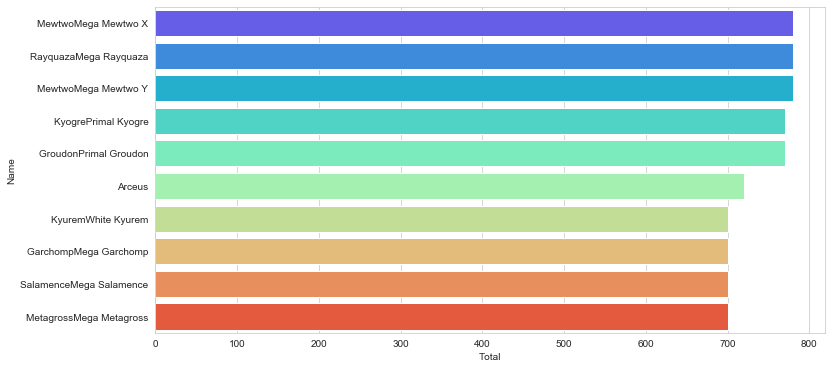

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(y='Name',x='Total', 
            data=pokemon.iloc[pokemon['Total'].sort_values(ascending=False)[:10].index], 
            palette="rainbow")

In [14]:
df = pokemon.iloc[pokemon['Sp. Atk'].sort_values(ascending=False)[:10].index]
fig = px.bar(df, x='Sp. Atk', y='Name', orientation='h',color='Legend',
            category_orders={'Name': df['Name'].tolist()})
fig.show()

In [15]:
df = pokemon.iloc[pokemon['Attack'].sort_values(ascending=False)[:10].index]
fig = px.bar(df, x='Attack', y='Name', orientation='h',color='Generation',
            category_orders={'Name': df['Name'].tolist()})
fig.show()

In [16]:
pokemon1 = 'Pikachu'
pokemon2 = 'Raichu'

In [17]:
def pokeplot(x,y):
    f = sns.FacetGrid(pokemon[(pokemon['Generation'].apply(lambda x: x in [1,2]))], hue='Legend', size=8) \
       .map(plt.scatter, x, y, alpha=0.5) \
       .add_legend()
    plt.subplots_adjust(top=0.9)
    f.fig.suptitle('{} vs. {}'.format(x, y))
    f.ax.set_xlim(0,)
    f.ax.set_ylim(0,)
    
    pkm1 = pokemon[pokemon['Name'] == pokemon1]
    pkm2 = pokemon[pokemon['Name'] == pokemon2]
    
    plt.scatter(pkm1[x],pkm1[y],s=100,marker='+', c='#1eff00')
    plt.text(pkm1[x]+3,pkm1[y]-6, pokemon1, 
             fontsize=13, weight='bold', color='#1eff00')
    
    plt.scatter(pkm2[x],pkm2[y],s=100,marker='x', c='#ff0000')
    plt.text(pkm2[x]+3,pkm2[y]-6, pokemon2, 
             fontsize=13, weight='bold', color='#ff0000')

/Users/zendz/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



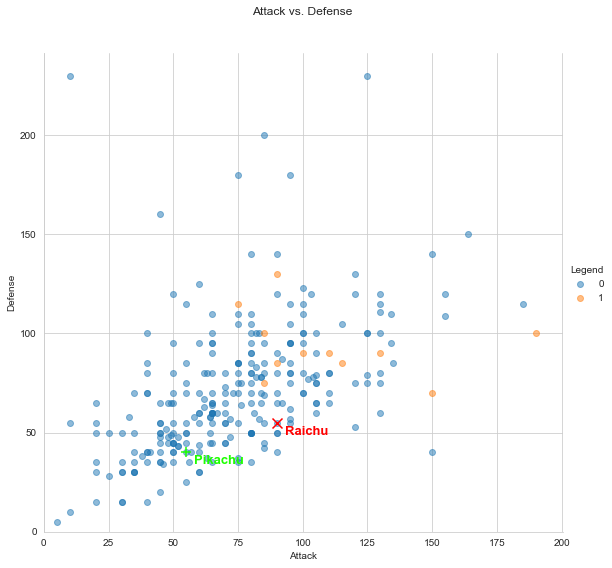

In [18]:
pokeplot('Attack','Defense')

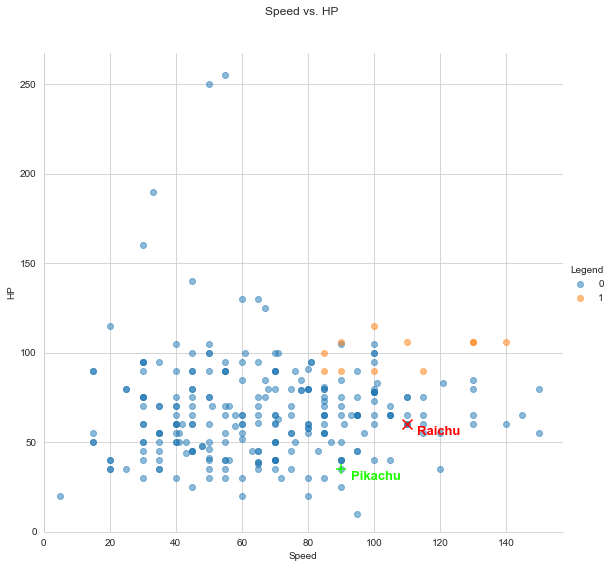

In [19]:
pokeplot('Speed','HP')

# Apply Basic ML


**1. Go to check the data and clean it**

In [20]:
pokemon.groupby(['Generation','Legend']).count()['Name']

Generation  Legend
1           0         160
            1           6
2           0         101
            1           5
3           0         142
            1          18
4           0         108
            1          13
5           0         150
            1          15
6           0          74
            1           8
Name: Name, dtype: int64

In [35]:
def type_numbering(string) : 
    if string == 'Normal' :
        return 1
    elif string== 'Fire' :
        return 2
    elif string == 'Fighting' :
        return 3
    elif string == 'Water' :
        return 4
    elif string == 'Flying' :
        return 5
    elif string == 'Grass' :
        return 6
    elif string == 'Poison' :
        return 7
    elif string == 'Electric' :
        return 8
    elif string == 'Ground' :
        return 9
    elif string == 'Psychic' :
        return 10
    elif string == 'Rock' :
        return 11
    elif string == 'Ice' :
        return 12
    elif string == 'Bug' :
        return 13
    elif string == 'Dragon' :
        return 14
    elif string == 'Ghost' :
        return 15
    elif string == 'Dark' :
        return 16
    elif string == 'Steel' :
        return 17
    elif string == 'Fairy' :
        return 18
    else :
        return 0

In [36]:
pokemon['Type 1'] = pokemon['Type 1'].apply(type_numbering)
pokemon['Type 2'] = pokemon['Type 2'].apply(type_numbering)

In [66]:
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legend,Scores
0,Bulbasaur,6,7,318,45,49,49,65,65,45,1,0,0.000000
1,Ivysaur,6,7,405,60,62,63,80,80,60,1,0,93.989361
2,Venusaur,6,7,525,80,82,83,100,100,80,1,0,223.593381
3,VenusaurMega Venusaur,6,7,625,80,100,123,122,120,80,1,0,333.241654
4,Charmander,2,0,309,39,52,43,60,50,65,1,0,29.614186


**2. Recommendation system for Pokemon list**

In [71]:
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.preprocessing import StandardScaler

In [42]:
pokematrix = pokemon.drop('Name',axis=1)

In [141]:
def check_type(x,a,b):
    pkm_type_1=x['Type 1']
    pkm_type_2=x['Type 2']
    if (pkm_type_1==a) and (pkm_type_2==b):
        return 1
    elif (pkm_type_1==a) or (pkm_type_2==b):
        return 0.5
    else:
        return 0

In [78]:
pkm_name = pokemon['Name']
indices = pd.Series(pokemon.index, index=pokemon['Name'])

In [142]:
def recommendations_1(pkm):
    idx = indices[pkm]
    pkm_type1= pokematrix.loc[idx]['Type 1']
    pkm_type2= pokematrix.loc[idx]['Type 2']
    sim_scores = []
    for i in range(pokemon.shape[0]):
        sim_scores.append(np.linalg.norm(pokematrix.loc[idx]-pokematrix.loc[i]))
    sim_scores = list(enumerate(sim_scores))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=False)
    sim_scores = sim_scores[1:31]
    pkm_indices = [i[0] for i in sim_scores]
    
    sim_pkm = pokemon.iloc[pkm_indices].copy()
    sim_pkm['sim_type'] = sim_pkm.apply(lambda x: check_type(x,pkm_type1,pkm_type2), axis=1)
    sim_pkm = sim_pkm.sort_values('sim_type', ascending=False).head(10)
    return sim_pkm

In [103]:
cosine_sim = cosine_similarity(pokematrix,pokematrix)

In [80]:
#cosine_sim[0]

In [143]:
def recommendations_2(pkm):
    idx = indices[pkm]
    pkm_type1= pokematrix.loc[idx]['Type 1']
    pkm_type2= pokematrix.loc[idx]['Type 2']
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    pkm_indices = [i[0] for i in sim_scores]
    
    sim_pkm = pokemon.iloc[pkm_indices].copy()
    sim_pkm['sim_type'] = sim_pkm.apply(lambda x: check_type(x,pkm_type1,pkm_type2), axis=1)
    sim_pkm = sim_pkm.sort_values('sim_type', ascending=False).head(10)
    return sim_pkm

In [144]:
recommendations_1('Charizard')

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legend,sim_type
171,Typhlosion,2,0,534,78,84,78,109,85,100,2,0,0.5
64,Arcanine,2,0,555,90,110,80,100,80,95,1,0,0.5
278,Blaziken,2,3,530,80,120,70,110,70,80,3,0,0.5
43,Ninetales,2,0,505,73,76,75,81,100,100,1,0,0.5
520,Yanmega,13,5,515,86,76,86,116,56,95,4,0,0.5
723,Delphox,2,10,534,75,69,72,114,100,104,6,0,0.5
736,Pyroar,2,1,507,86,68,72,109,66,106,6,0,0.5
518,Magmortar,2,0,540,75,95,67,125,95,83,4,0,0.5
437,Infernape,2,3,534,76,104,71,104,71,108,4,0,0.5
130,Starmie,4,10,520,60,75,85,100,85,115,1,0,0.0


In [145]:
recommendations_2('Charizard')

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legend,sim_type
158,Moltres,2,5,580,90,100,90,125,85,90,1,1,1.0
171,Typhlosion,2,0,534,78,84,78,109,85,100,2,0,0.5
4,Charmander,2,0,309,39,52,43,60,50,65,1,0,0.5
572,Pansear,2,0,316,50,53,48,53,48,64,5,0,0.5
23,PidgeotMega Pidgeot,1,5,579,83,80,80,135,80,121,1,0,0.5
723,Delphox,2,10,534,75,69,72,114,100,104,6,0,0.5
435,Chimchar,2,0,309,44,58,44,58,44,61,4,0,0.5
735,Litleo,2,1,369,62,50,58,73,54,72,6,0,0.5
5,Charmeleon,2,0,405,58,64,58,80,65,80,1,0,0.5
169,Cyndaquil,2,0,309,39,52,43,60,50,65,2,0,0.5


**3. Predict whether a pokemon is legendary base on stats (Basic ML)**

In [124]:
pokemon.drop('Name',axis=1,inplace=True)

2. Create data for training and testing by using Train Test Split

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X= pokemon.drop('Legend',axis=1)
y= pokemon['Legend']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=90)

3. Using model

In [130]:
from sklearn.metrics import confusion_matrix,classification_report

**Logistic Regression**

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
logmode = LogisticRegression()

In [129]:
logmode.fit(X_train,y_train)

/Users/zendz/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
y_pred = logmode.predict(X_test)

In [189]:
cm = pd.DataFrame(confusion_matrix(y_test,y_pred), 
                  index = ['Non-Legendary', 'Legendary'], columns = ['Non-Legendary', 'Legendary'])
print(cm)

               Non-Legendary  Legendary
Non-Legendary            215          1
Legendary                 19          5


In [133]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       216
           1       0.83      0.21      0.33        24

    accuracy                           0.92       240
   macro avg       0.88      0.60      0.64       240
weighted avg       0.91      0.92      0.89       240



**Decision Tree**

In [134]:
from sklearn.tree import DecisionTreeClassifier

In [170]:
dtc = DecisionTreeClassifier(max_depth=5)

In [172]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [173]:
y_pred2 = dtc.predict(X_test)

In [190]:
cm = pd.DataFrame(confusion_matrix(y_test,y_pred2), 
                  index = ['Non-Legendary', 'Legendary'], columns = ['Non-Legendary', 'Legendary'])
print(cm)

               Non-Legendary  Legendary
Non-Legendary            210          6
Legendary                  6         18


In [175]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       216
           1       0.75      0.75      0.75        24

    accuracy                           0.95       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.95      0.95      0.95       240



**Random Forest**

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [192]:
rfc= RandomForestClassifier(max_depth=5)

In [193]:
rfc.fit(X_train,y_train)

/Users/zendz/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [194]:
y_pred3 = rfc.predict(X_test)

In [203]:
cm = pd.DataFrame(confusion_matrix(y_test,y_pred3), 
                  index = ['Non-Legendary', 'Legendary'], columns = ['Non-Legendary', 'Legendary'])
print(cm)

               Non-Legendary  Legendary
Non-Legendary            212          4
Legendary                 11         13


In [204]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       216
           1       0.76      0.54      0.63        24

    accuracy                           0.94       240
   macro avg       0.86      0.76      0.80       240
weighted avg       0.93      0.94      0.93       240



**Support Vecter Machines**

In [146]:
from sklearn.svm import SVC

In [180]:
svc= SVC()

In [181]:
from sklearn.model_selection import GridSearchCV
params = {'C':[0.1, 1, 10, 100, 1000],'gamma':[1, 0.1, .01, .001, .0001]}
grid = GridSearchCV(estimator=svc, param_grid=params,refit=True,verbose=2)
grid.fit(X_train, y_train)

/Users/zendz/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[CV] ............................... C=1000, gamma=0.01, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ............................... C=1000, gamma=0.01, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .............................. C=1000, gamma=0.001, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .............................. C=1000, gamma=0.001, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .............................. C=1000, gamma=0.001, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ............................. C=1000, gamma=0.0001, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ............................. C=1000, gamma=0.0001, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [182]:
print(grid.best_score_)
print(grid.best_params_)

0.9464285714285714
{'C': 1, 'gamma': 0.0001}


In [183]:
pred_g = grid.predict(X_test)

In [202]:
cm = pd.DataFrame(confusion_matrix(y_test,pred_g), 
                  index = ['Non-Legendary', 'Legendary'], columns = ['Non-Legendary', 'Legendary'])
print(cm)

               Non-Legendary  Legendary
Non-Legendary            214          2
Legendary                 17          7


In [201]:
print(classification_report(y_test,pred_g))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       216
           1       0.78      0.29      0.42        24

    accuracy                           0.92       240
   macro avg       0.85      0.64      0.69       240
weighted avg       0.91      0.92      0.90       240

